In [ ]:
import pandas as pd

# Dosyayı yükleme
df = pd.read_csv('musteriler_guncel_v3.csv')  # Yolunuza uygun olarak değiştirin

# Sütun adlarını yazdırma
(df.head())
(df.columns)


Index(['CustomerID', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'jobs', 'Total_Trans_Ct', 'Total_Trans_Amt',
       'Ocak_Trans_Ct', 'Subat_Trans_Ct', 'Mart_Trans_Ct', 'Nisan_Trans_Ct',
       'Mayis_Trans_Ct', 'Haziran_Trans_Ct', 'Temmuz_Trans_Ct',
       'Ocak_Trans_Amt', 'Subat_Trans_Amt', 'Mart_Trans_Amt',
       'Nisan_Trans_Amt', 'Mayis_Trans_Amt', 'Haziran_Trans_Amt',
       'Temmuz_Trans_Amt', 'credit_card_tran_ct', 'credit_card_tran_Amt',
       'credit_card_tran_ct_1', 'credit_card_tran_ct_2',
       'credit_card_tran_ct_3', 'credit_card_tran_ct_4',
       'credit_card_tran_ct_5', 'credit_card_tran_ct_6',
       'credit_card_tran_ct_7', 'credit_

In [ ]:
# Veri türlerini kontrol etme
print(df[['Months_on_book', 'Credit_Limit']].dtypes)

# Veri türlerini dönüştürme
df['Months_on_book'] = pd.to_numeric(df['Months_on_book'], errors='coerce')
df['Credit_Limit'] = pd.to_numeric(df['Credit_Limit'], errors='coerce')

# Veri türlerini kontrol etme (dönüştürme sonrası)
print(df[['Months_on_book', 'Credit_Limit']].dtypes)


Months_on_book     object
Credit_Limit      float64
dtype: object
Months_on_book    float64
Credit_Limit      float64
dtype: object


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# `Total_Revolving_Bal` değerlerini aralıklara bölme
bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000']
df['Revolving_Bal_Range'] = pd.cut(df['Total_Revolving_Bal'], bins=bins, labels=labels, right=False)

# Her aralık için ortalama `Avg_Open_To_Buy` hesaplama
revolving_bal_open_to_buy = df.groupby('Revolving_Bal_Range')['Avg_Open_To_Buy'].mean().reset_index()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Verileri içe aktarma
customers_df = pd.read_csv('musteriler_guncel_v3.csv')
transactions_df = pd.read_csv('transaction_updated.csv')

# Veri türlerini dönüştürme
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

<ipython-input-5-6c11524a6224>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


In [ ]:
# Örnek müşteri ID'si girme
customer_id = '708373083'  # Belirli bir müşteri ID'si buraya manuel olarak girilecek

# Müşteri ID'sinin veri türünü kontrol etme ve dönüştürme
customers_df['CustomerID'] = customers_df['CustomerID'].astype(str)
transactions_df['CustomerID'] = transactions_df['CustomerID'].astype(str)

# Seçilen müşteri verilerini filtreleme
customer_data = customers_df[customers_df['CustomerID'] == customer_id]
customer_transactions = transactions_df[transactions_df['CustomerID'] == customer_id]

In [ ]:
print("Customer Data:")
print(customer_data)
print("\nCustomer Transactions:")
print(customer_transactions)

Customer Data:
  CustomerID  Customer_Age Gender  Dependent_count Education_Level  \
7  708373083            40      F                4         Unknown   

  Marital_Status Income_Category Card_Category Months_on_book  \
7        Married     $40K - $60K          Blue             30   

   Total_Relationship_Count  ...  credit_card_tran_ct_5  \
7                         1  ...                     25   

   credit_card_tran_ct_6  credit_card_tran_ct_7  credit_card_tran_Amt_1  \
7                     14                      4                  719.08   

   credit_card_tran_Amt_2  credit_card_tran_Amt_3  credit_card_tran_Amt_4  \
7                 4094.15                 2643.16                 1854.87   

   credit_card_tran_Amt_5 credit_card_tran_Amt_6  credit_card_tran_Amt_7  
7                 1669.26                4219.78                  644.52  

[1 rows x 51 columns]

Customer Transactions:
     TransactionID CustomerID   TransactionType   Amount     TransactionDate  \
532        

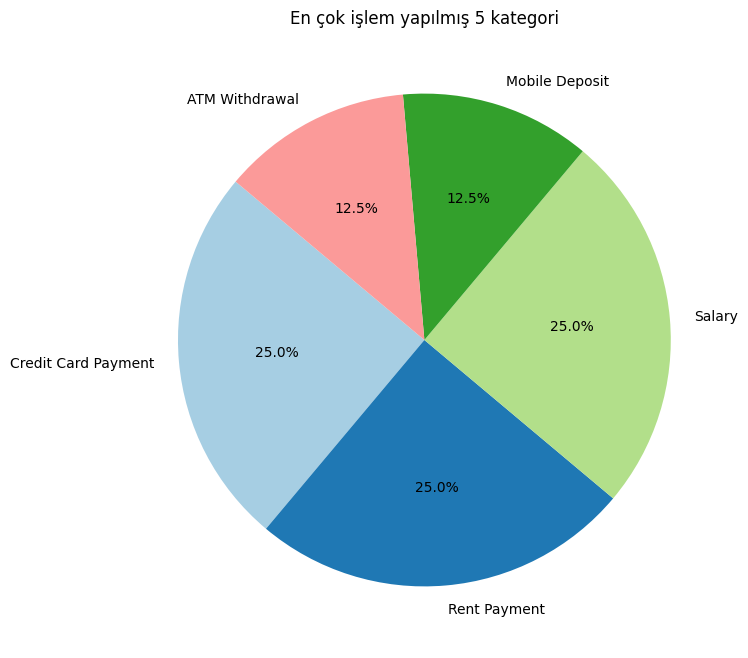

In [ ]:
# En çok harcama yapılan 5 kategori
top5_categories = customer_transactions['Description'].value_counts().nlargest(5)

if not top5_categories.empty:
    plt.figure(figsize=(10, 8))
    plt.pie(top5_categories, labels=top5_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(5)))
    plt.title('En çok işlem yapılmış 5 kategori')
    plt.show()
else:
    print("No transactions found for the selected customer.")

In [1]:
# Zaman içinde toplam kredi kartı harcaması
credit_spending_over_time = customer_transactions.groupby('TransactionDate')['Amount'].sum()
plt.figure(figsize=(14, 8))
plt.plot(credit_spending_over_time, label='Total Credit Card Spending', color='blue')
plt.title('Transaction Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

NameError: name 'customer_transactions' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
import ipywidgets as widgets

# Veri setini yükle
df = pd.read_csv('transaction_updated.csv')

# Tarih sütununu datetime türüne çevir
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Ay ve yıl sütunu ekle
df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month

# Dropdown için ay ve yıl kombinasyonlarını hazırla
unique_dates = df['TransactionDate'].dt.to_period('M').drop_duplicates().sort_values()
options = [(date.strftime('%Y-%m'), date) for date in unique_dates]

# Dropdown widget'ını oluştur
dropdown = Dropdown(options=options, description='Select Month:')

# Grafik çizdirme fonksiyonu
def plot_spending(date):
    # Seçilen tarihe göre veriyi filtrele
    mask = (df['TransactionDate'].dt.year == date.year) & (df['TransactionDate'].dt.month == date.month)
    filtered_data = df[mask]

    # Zaman içinde toplam harcamayı hesapla
    credit_spending_over_time = filtered_data.groupby('TransactionDate')['Amount'].sum()

    # Çizgi grafiği çiz
    plt.figure(figsize=(14, 8))
    if not credit_spending_over_time.empty:
        plt.plot(credit_spending_over_time.index, credit_spending_over_time, label='Total Credit Card Spending', color='blue')
        plt.title(f'Credit Card Spending for {date.strftime("%B %Y")}')
        plt.xlabel('Date')
        plt.ylabel('Amount')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("No data available for the selected month.")

# Widget ile interaktif fonksiyonu kullan
interact(plot_spending, date=dropdown)


<ipython-input-24-6f99335357b7>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


interactive(children=(Dropdown(description='Select Month:', options=(('2024-01', Period('2024-01', 'M')), ('20…

<function __main__.plot_spending(date)>

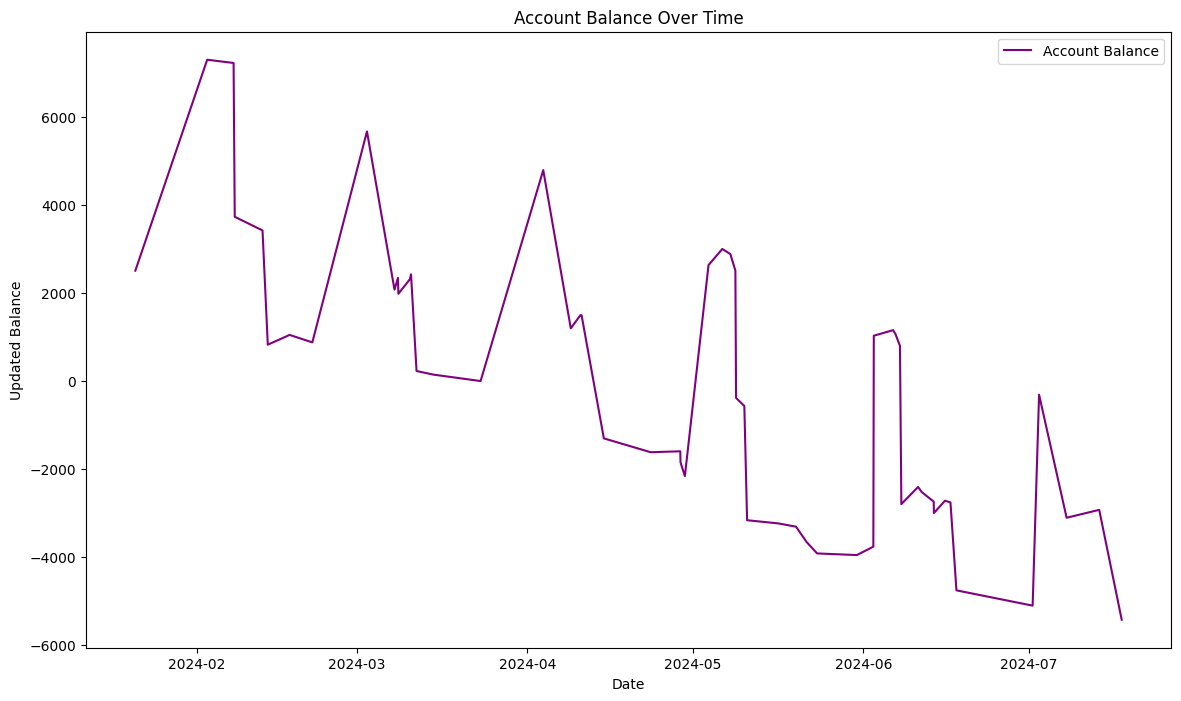

In [ ]:
# Zaman içinde hesap bakiyesinin değişimi
balance_over_time = customer_transactions.groupby('TransactionDate')['UpdatedBalance'].last()

plt.figure(figsize=(14, 8))
plt.plot(balance_over_time, label='Account Balance', color='purple')
plt.title('Account Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Updated Balance')
plt.legend()
plt.show()

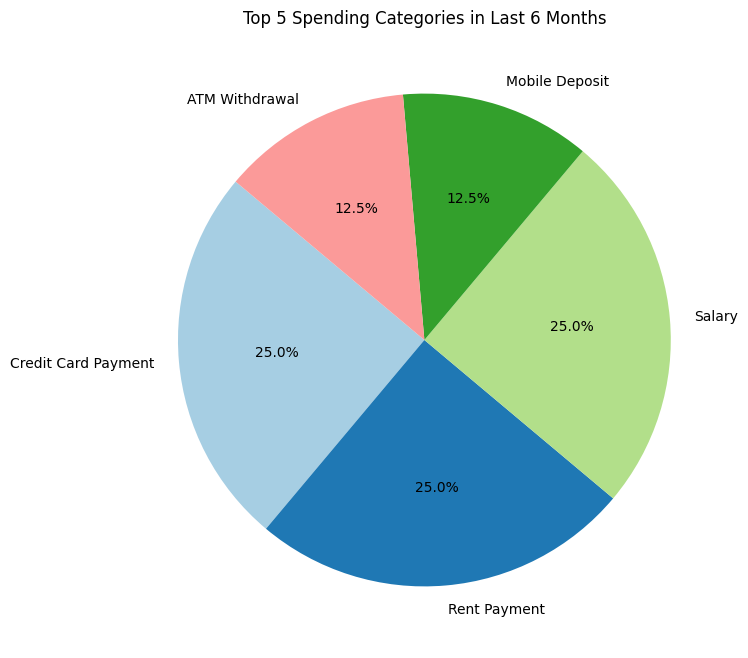

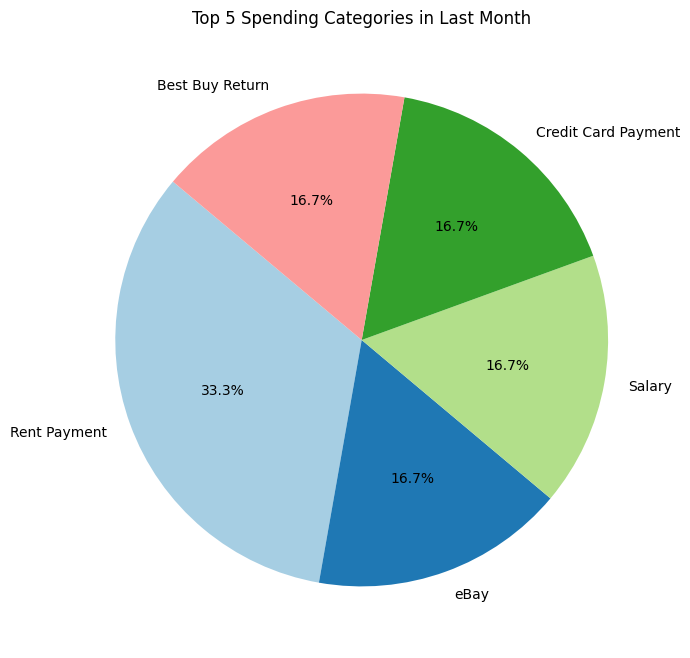

In [ ]:
# Son 6 ay ve son ayın en çok harcama yapılan kategorileri
last_six_months = customer_transactions[customer_transactions['TransactionDate'] >= (customer_transactions['TransactionDate'].max() - pd.DateOffset(months=6))]
last_month = customer_transactions[customer_transactions['TransactionDate'] >= (customer_transactions['TransactionDate'].max() - pd.DateOffset(months=1))]

top5_categories_last_six_months = last_six_months['Description'].value_counts().nlargest(5)
top5_categories_last_month = last_month['Description'].value_counts().nlargest(5)

plt.figure(figsize=(10, 8))
plt.pie(top5_categories_last_six_months, labels=top5_categories_last_six_months.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(5)))
plt.title('Top 5 Spending Categories in Last 6 Months')
plt.show()

plt.figure(figsize=(10, 8))
plt.pie(top5_categories_last_month, labels=top5_categories_last_month.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(5)))
plt.title('Top 5 Spending Categories in Last Month')
plt.show()

<ipython-input-18-3df7ca8fe653>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


CustomerID'lerin benzersiz değerleri:
['708134283' '708147108' '708177333' '708242283' '708249708' '708303108'
 '708337683' '708373083' '708384033' '708414033' '708423933' '708474333'
 '708482658' '708525108' '708597558' '708646233' '708689958' '708704433'
 '708745983' '708796458' '708804633' '708816408' '708823908' '708862233'
 '708868233' '708902883' '709040508' '709061658' '709077933' '709134333'
 '709169133' '709207458' '709224858' '709267308' '709274583' '709327383'
 '709346133' '709410033' '709449333' '709455108' '709486158' '709537683'
 '709585758' '709722858' '709787733' '709790058' '709814883' '709831983'
 '709957158' '709986633' '710014683' '710027508' '710032608' '710045058'
 '710056758' '710180958' '710197308' '710229333' '710295858' '710364258'
 '710424408' '710431158' '710538183' '710595783' '710639658' '710773533'
 '710831133' '710845308' '710854008' '710897133' '711069483' '711080358'
 '711232608' '711263058' '711275433' '711283008' '711286533' '711379083'
 '711389358' 

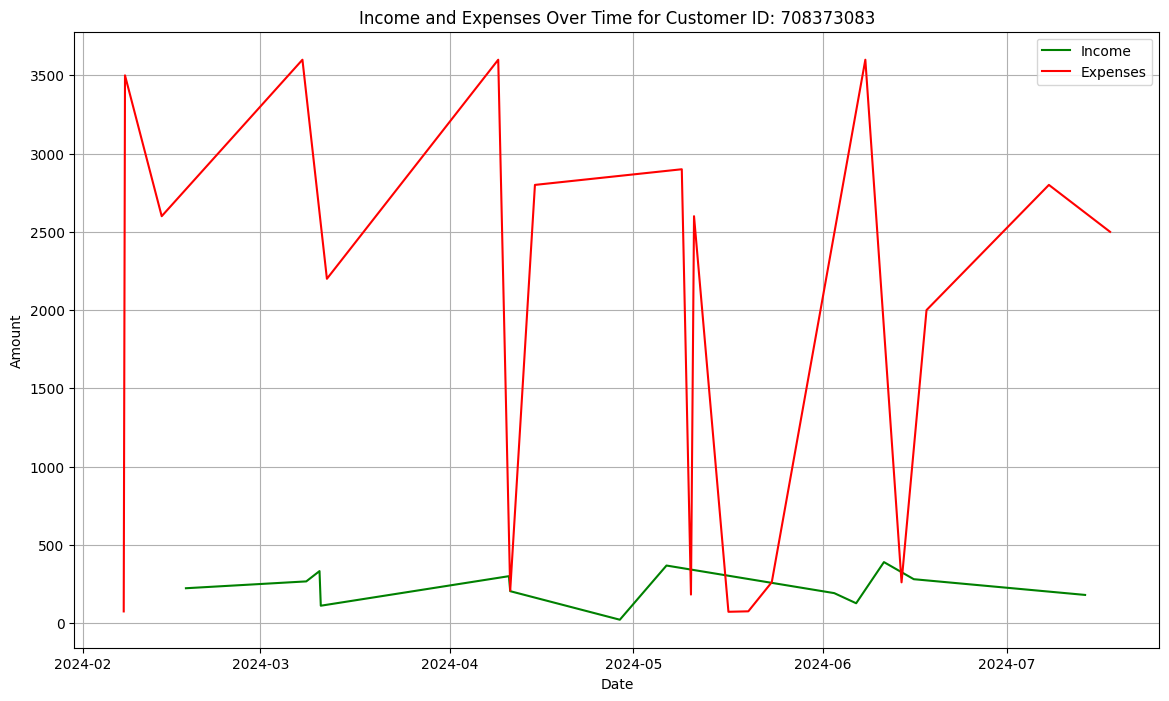

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını yükleme
df = pd.read_csv('transaction_updated.csv')

# Tarih sütununu datetime formatına çevirme
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# CustomerID sütununun veri tipini kontrol etme ve gerekirse düzenleme
df['CustomerID'] = df['CustomerID'].astype(str)
print("CustomerID'lerin benzersiz değerleri:")
print(df['CustomerID'].unique())

# Belirli bir müşteri ID'si
customer_id = '708373083'  # Örnek müşteri ID'si, burada ID'nin string olarak belirtilmesi önemli

# Müşteriye özel verileri filtreleme
customer_data = df[df['CustomerID'] == customer_id]

if not customer_data.empty:
    # İşlem türlerine göre gelir ve gider işlemlerini sınıflandırma
    income_data = customer_data[customer_data['TransactionType'].isin(['Deposit', 'Return'])]
    expense_data = customer_data[customer_data['TransactionType'].isin(['Withdrawal', 'Payment'])]

    # Zaman içinde toplam gelir ve giderleri hesaplama
    income_over_time = income_data.groupby('TransactionDate')['Amount'].sum()
    expenses_over_time = expense_data.groupby('TransactionDate')['Amount'].sum()

    # Gelir ve giderleri görselleştirme
    plt.figure(figsize=(14, 8))
    plt.plot(income_over_time.index, income_over_time, label='Income', color='green')
    plt.plot(expenses_over_time.index, expenses_over_time, label='Expenses', color='red')
    plt.title(f'Income and Expenses Over Time for Customer ID: {customer_id}')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No data found for customer ID {customer_id}")


<ipython-input-20-d7ca78e6e7bf>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


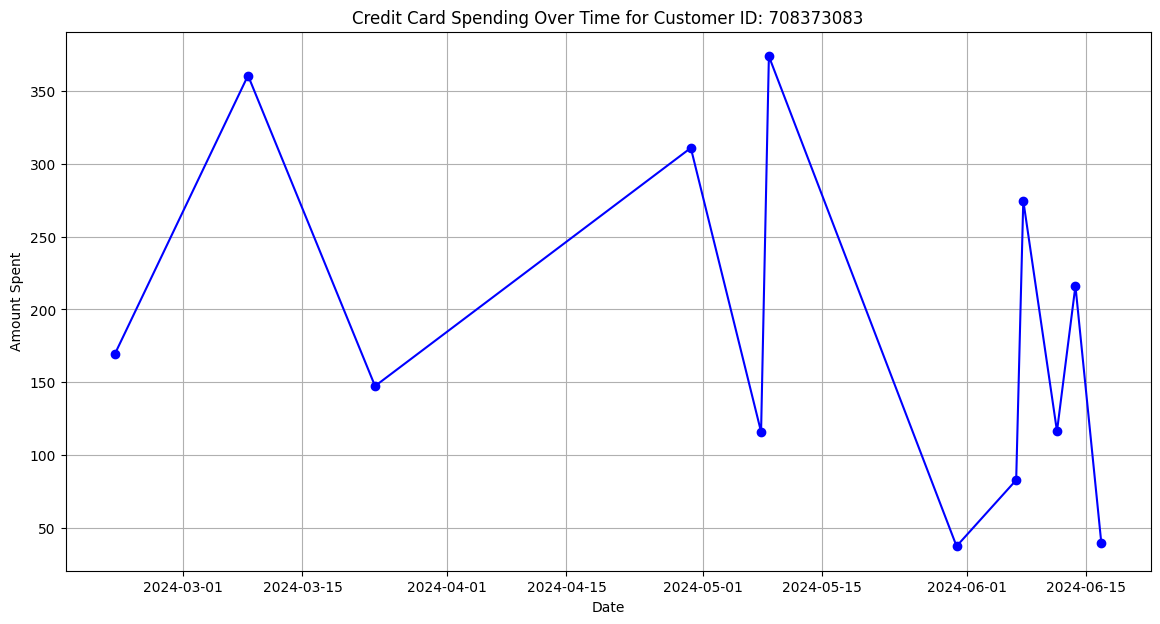

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini yükle
df = pd.read_csv('transaction_updated.csv')

# Tarih sütununu datetime türüne çevir
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Müşteri ID'sini string olarak belirt ve tüm müşteri ID'lerini string'e çevir
customer_id = '708373083'  # Örnek bir müşteri ID'si
df['CustomerID'] = df['CustomerID'].astype(str)

# Belirli bir müşteriye ait verileri filtrele
customer_data = df[df['CustomerID'] == customer_id]

# Kredi kartı işlemlerini filtrele (örnek olarak 'Purchase' türünü varsayalım)
credit_card_spending = customer_data[customer_data['TransactionType'].str.contains('Purchase', na=False)]

# Zaman içinde toplam harcamaları grupla
spending_over_time = credit_card_spending.groupby('TransactionDate')['Amount'].sum()

# Çizgi grafiği çiz
plt.figure(figsize=(14, 7))
if not spending_over_time.empty:
    plt.plot(spending_over_time.index, spending_over_time, marker='o', linestyle='-', color='blue')
    plt.title('Credit Card Spending Over Time for Customer ID: ' + customer_id)
    plt.xlabel('Date')
    plt.ylabel('Amount Spent')
    plt.grid(True)
    plt.show()
else:
    print("No credit card transactions found for customer ID:", customer_id)
